# Physics Analysis using CMS Opendata

1. Using the CSV format in Jupyter
    * Reading the CSV file
    * Observing and selecting 


2. Extracting data and saving it to a new file 


3. Adding column to a DataFrame
 * Performing the calculation of the invariant mass
    
4. Statistics with the CMS Open Data
    * Mean
    * Variance
    * Standard deviation
    
5. Selecting the amount of data
    * Evolving of the histogram when the amount of data increases

6. Plotting the invariant mass histogram
    * Plotting the histogram without the weights
    * Plotting the histogram with weights
    
7. The effect of the pseudorapidity $\eta$ to the resolution of the CMS detector
    * Pseudorapidity
    * The effect of pseudorapidity to the resolution of the measurement

8. Exercises

# Using the CSV format in Jupyter

The data collected by the CMS detector can be handled in many different file formats. One easy way is to handle the data in CSV files (comma-separated values). A CSV file is basically a regular text file which includes values separated by commas and lines.

### Reading the CSV file


CSV files can be read for example with the function `read_csv( )` of the pandas module. Let's use the data collected by the CMS detector in 2011 [1]. 

[1] CMS collaboration (2016). DoubleMu primary dataset in AOD format from RunA of 2011 (/DoubleMu/Run2011A-12Oct2013-v1/AOD). CERN Open Data Portal. DOI: 10.7483/OPENDATA.CMS.RZ34.QR6N. 

To install pandas via conda: `conda install -c anaconda pandas` or install a package only in the currenty kernel:

```
# Install a conda package in the current Jupyter kernel
import sys
!conda install --yes --prefix {sys.prefix} pandas
```

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Jupyter Notebook uses "magic functions". With this function it is possible to plot
# the histogram straight to notebook.
%matplotlib inline

pd.set_option('display.max_columns', None)

dataset = pd.read_csv('Data/DoubleMuRun2011A.csv')
print("The file has %d rows."% len(dataset))

The file has 475465 rows.


We can check what kind of information the file we read contains. Let's use the command `head( )` of the **pandas** module which will print the first five lines of the DataFrame variable written before the command ([pandas documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html)).

In [4]:
dataset.head()

,Run,Event,Type1,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,Type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,165617,74601703,G,9.69873,-9.510430,0.366205,1.86329,9.51748,0.194546,3.10311,-1,G,9.76332,7.327710,-1.152370,6.34728,7.41776,0.775564,-0.155984,1,17.49220
1,165617,75100943,G,6.20385,-4.266610,0.456545,-4.47930,4.29097,-0.912070,3.03499,-1,G,9.66898,7.273970,-2.821120,-5.71040,7.80188,-0.678625,-0.369977,1,11.55340
2,165617,75587682,G,19.28920,-4.212080,-0.651623,18.81210,4.26219,2.190460,-2.98811,-1,G,9.82439,4.343940,-0.473505,8.79849,4.36967,1.449670,-0.108575,1,9.16361
3,165617,75660978,G,7.04268,-6.326780,-0.268545,3.08025,6.33248,0.469033,-3.09917,-1,G,5.58571,4.474760,0.848935,-3.23185,4.55458,-0.660499,0.187488,1,12.47740
4,165617,75947690,G,7.27507,0.102966,-5.533080,-4.72122,5.53403,-0.773616,-1.55219,-1,G,7.31811,-0.398831,6.940810,2.28247,6.95226,0.322677,1.628190,1,14.31590


Notice that there are more lines in the variable `dataset` than the five printed. We can check the number of the lines with the function `len( )` which will return the length of the variable given in the brackets.

In [5]:
len(dataset)

475465

### Observing and selecting the values


From the print above, we can see that the content of the file has been saved into a table (DataFrame tabular data structure). Each line of the table represent a different collision event and the columns include different saved values for the event. Some of the values are measured by the detector and some have been calculated from the measured values.

Values in the table can be accessed with the pandas module. For example the data we are using contains the charges of two muons marked as `Q1` and `Q2`. We can select certain columns from a table e.g. the charges of the first muon for all of the events by referring to the column name:

In [6]:
dataset['Q1']

0        -1
1        -1
2        -1
3        -1
4        -1
         ..
475460    1
475461    1
475462   -1
475463   -1
475464   -1
Name: Q1, Length: 475465, dtype: int64

Now the code printed the values of the column `Q1` of the variable dataset. Of course all of the values will not be printed (there are over of 470000 of them) and on the last line of the print you can see the name, lengt and tyoe of the information printed.

The numbers on the left tell the index of the line and the numbers on the right are the values of the charges. By replacing the `Q1` in the code it is possible to select any of the column from the dataset (e.g. `pt1`, `eta1`, `phi2`, ...).

If for example only the ten first values of the charges are wanted to be selected, it can be done by using the `.loc` method. In the method the brackets first include the indexes of the lines wanted to be selected (here lines 0--10) and after those the name of the column from where the lines will be selected (here `Q1`). 

In [7]:
dataset.loc[0:10, 'Q1']
# If you use Python 2, use
# dataset.ix[0:10, 'Q1']

0    -1
1    -1
2    -1
3    -1
4    -1
5    -1
6    -1
7     1
8    -1
9    -1
10    1
Name: Q1, dtype: int64

Also individual values can be picked. Let's say we want to see that charges from indices 0,1,5 and 10. This can be done with

In [8]:
dataset.loc[[0,1,5,10],'Q1']
# If you use Python 2, use
# dataset.ix[[0,1,5,10],'Q1']

0    -1
1    -1
5    -1
10    1
Name: Q1, dtype: int64

### Other notes

- There are also other options for selecting the values. For example this [Stack Overflow link](http://stackoverflow.com/questions/31593201/pandas-iloc-vs-ix-vs-loc-explanation) includes other possibilities of the _pandas_ module. CSV files can also be read with other modules or libraries.
- Note that different CSV files include different data depending on from which kind of collision events the file has been created. You can always check the content of the file by opening it in the Jupyter or in a text editor.

# Extracting data and saving it to a new file


Let's walks you through how to read csv-data, select certain data using selection rules and saving selected data into a new file.

Plot a histogram of the invariant masses using the whole dataset.

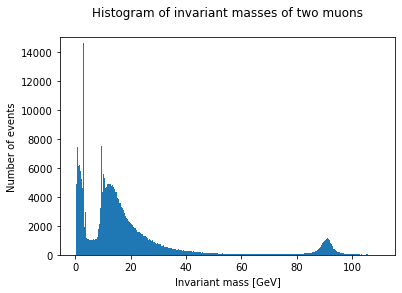

In [9]:
plt.hist(dataset['M'], bins=500, range=(0,110))

axes = plt.gca()
axes.set_ylim([0,15000])

# Name the axis and set a title
plt.xlabel('Invariant mass [GeV]')
plt.ylabel('Number of events')
plt.title('Histogram of invariant masses of two muons\n') # \n creates a new line for making the title look better

# Show the plot.
plt.show()

Histogram shows multiple peaks from which we are interested in the one on the right. Let's choose the rows from the original data that hae invariant mass values between `70 < M < 110` and save these into variable `peakdata`. We can also check how many rows of data fill these conditions.

In [10]:
peakdata = dataset[(dataset.M>70) & (dataset.M<110)] #Z
len(peakdata)

33177

We can now easily plot a histogram for invariant masses of the selected data.

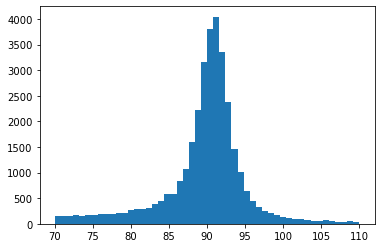

In [11]:
inv_mass = peakdata['M']
plt.hist(inv_mass, bins=50)
plt.show()

The selected conditions for data seem applicable but let's check the minimum and maximum values for invariant mass in our selected data. This way we can make sure that our conditions hold.

In [12]:
minimum = min(peakdata['M'])
maximum = max(peakdata['M'])
print("The smallest value of invariant mass is %f and the greatest is %f in selected data." %(minimum,maximum))

The smallest value of invariant mass is 70.006900 and the greatest is 109.999000 in selected data.


We see that our conditions hold so let's save the data in `peakdata` into a csv-file and name it `peak.csv`. We can leave out the original indices but it's good to keep the original column titels. The created file will be saved in the same folder with the notebook.

In [13]:
peakdata.to_csv('peak.csv',index=False,header=True)

We can make sure that we managed to save the data we wanted by reading the file `peak.csv` and printing the first five rows of it.

In [14]:
test = pd.read_csv('peak.csv')
test.head()

,Run,Event,Type1,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,Type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,165617,74969122,G,59.9226,-46.15160,29.4115,-24.4070,54.7266,-0.432382,2.574210,1,G,52.4465,30.10970,-16.39890,-39.68760,34.2859,-0.988511,-0.498717,-1,89.9557
1,165617,75138253,G,97.1011,-23.61440,6.6660,-93.9497,24.5372,-2.052350,2.866470,-1,G,30.5992,-11.61340,-25.98480,11.23470,28.4619,0.385137,-1.991090,1,88.6081
2,165617,75887636,G,152.9720,7.46565,-30.7098,-149.6710,31.6042,-2.259260,-1.332320,-1,G,33.5835,-9.28778,28.74570,-14.67190,30.2089,-0.468368,1.883310,1,88.2438
3,165617,75833588,G,181.8770,44.14270,-14.9498,175.8040,46.6055,2.037920,-0.326545,1,G,170.0210,-34.63010,12.32480,166.00000,36.7579,2.212820,2.799670,-1,83.0943
4,165617,75779415,G,50.2440,37.80720,-12.2044,-30.7590,39.7283,-0.712422,-0.312246,1,G,49.2396,-47.60640,8.23376,-9.50613,48.3132,-0.195513,2.970330,-1,90.3544


# Adding column to a DataFrame


This example demonstrates how to import a csv.-file, calculate using its values and how to add calculated values to the original table. In this example we calculate the invariant masses for different events.

We need to import packages **numpy** in order to make calculations.

In [15]:
import numpy as np

and also the type of the variable. We need to know the type since we want to combine our calcutations with this variable.

In [16]:
type(dataset)

pandas.core.frame.DataFrame

### Performing the calculation of the invariant mass

Let's use the following expression for the invariant mass $M$ in the calculation

$$M = \sqrt{2p_{T1}p_{T2}(\cosh(\eta_1-\eta_2)-\cos(\phi_1-\phi_2))}.$$
and use **numpy (np)** for performing the calculation.

In [17]:
my_invariant_mass = np.sqrt(2*dataset.pt1*dataset.pt2*(np.cosh(dataset.eta1-dataset.eta2) - np.cos(dataset.phi1-dataset.phi2)))

After the calculation we can check which values were saved in the variable `my_invariant_mass` by printing the content of the variable:

In [18]:
print(my_invariant_mass)

0         17.490875
1         11.551382
2          9.160909
3         12.475632
4         14.314303
            ...    
475460    39.723786
475461    15.306716
475462    28.730132
475463    23.617769
475464    23.824477
Length: 475465, dtype: float64


Let's add the column of invariant masses to the original `dataset` which is the type DataFrame. First we need to know the type of `my_invariant_mass`

In [19]:
type(my_invariant_mass)

pandas.core.series.Series

Since `my_invariant_mass` is a **Series**, we need to convert it into a DataFrame. Let's name the conversion `inv_masses` and give the column a heading `myM`.

In [20]:
inv_masses = my_invariant_mass.to_frame('myM')

Now we can combine `dataset` with `inv_masses` using the command `merge`. Let's save it into a variable `all_data`.

In [21]:
all_data = dataset.merge(inv_masses, left_index=True, right_index=True)
all_data.head()

,Run,Event,Type1,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,Type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M,myM
0,165617,74601703,G,9.69873,-9.510430,0.366205,1.86329,9.51748,0.194546,3.10311,-1,G,9.76332,7.327710,-1.152370,6.34728,7.41776,0.775564,-0.155984,1,17.49220,17.490875
1,165617,75100943,G,6.20385,-4.266610,0.456545,-4.47930,4.29097,-0.912070,3.03499,-1,G,9.66898,7.273970,-2.821120,-5.71040,7.80188,-0.678625,-0.369977,1,11.55340,11.551382
2,165617,75587682,G,19.28920,-4.212080,-0.651623,18.81210,4.26219,2.190460,-2.98811,-1,G,9.82439,4.343940,-0.473505,8.79849,4.36967,1.449670,-0.108575,1,9.16361,9.160909
3,165617,75660978,G,7.04268,-6.326780,-0.268545,3.08025,6.33248,0.469033,-3.09917,-1,G,5.58571,4.474760,0.848935,-3.23185,4.55458,-0.660499,0.187488,1,12.47740,12.475632
4,165617,75947690,G,7.27507,0.102966,-5.533080,-4.72122,5.53403,-0.773616,-1.55219,-1,G,7.31811,-0.398831,6.940810,2.28247,6.95226,0.322677,1.628190,1,14.31590,14.314303


As you can see, the calculated invariant masses are now in the last column with heading `M`.

# Statistics with the CMS Open Data
 
    
With Python it is easy to calculate statistical values for the CMS Open Data. In this notebook we will learn how to calculate the mean, the variance and the standard deviation.

## Mean $\bar x$

The mean can be easily calculated with the function `mean( )` of the **numpy** module. Let's calculate the mean of the invariant masses of the whole data:

In [22]:
mean_masses = np.mean(inv_mass)
print(mean_masses)

89.69557585073998


## Variance $\sigma^2$

The variance is determined by the equation

$$\sigma^2 = \frac{\sum_{i=1}^{n}(x_i-\bar{x})^2}{n}.$$

With Python the variance can be calculated with the function `var( )` of the **numpy** module. Let's do that for the whole data

In [23]:
variance = np.var(inv_mass)
print(variance)

30.34167863693015


## Standard deviation $\sigma$

Because the standard deviation is the square root of the variance, we can calculate the standard deviation with the function `sqrt( )` of the **numpy** module. The function `sqrt( )` calculates the square root for the given value. Once again for the whole data we get

In [24]:
sd = np.sqrt(variance)
print(sd)

5.508328116309898


# Selecting the amount of data

The code below asks how many events will be selected to the histogram. After that the code plots the histogram of the selected invariant masses.

Examine how the amount of the data used affects to the histogram. Which values of the invariant mass there seems to be most? What you can conclude from those values?
By examining the code predict what will happen if you enter a number bigger than 475465 for the asked amount of data. Try your prediction by running the code.

In [25]:
# Create a Series structure (basically a list) and name it to "invariant_mass".
# Save the column "M" from the "dataset" to the variable "invariant_mass".
invariant_mass = dataset['M']

# Create an empty list "selected", where the selected amount of invariant masses will be saved.
selected = []

Enter the amount of events wanted: 100000

 You selected 100000 invariant mass values from the whole data.


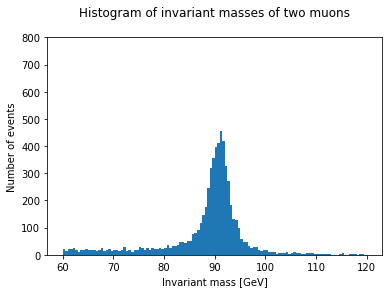

In [41]:
# Ask user to enter the number of events wanted. Save the number to variable "amount".
amount = int(input('Enter the amount of events wanted: '))

# Check if user have selected more events than there are available.
# If not select that amount of invariant masses from the variable "invariant_mass".
# Masses will be selected in order.
if amount > 475465:
    print('''You have tried to select more data than there are available in the file.
The histogram couldn't be drawn. The maximum amount of the data is 10851.''')
else:
    for f in range(amount):
        M = invariant_mass[f]
        selected.append(M)
    print('\n You selected {} invariant mass values from the whole data.'.format(amount))

# Jupyter Notebook uses "magic functions". With this function it is possible to plot
# the histogram straight to notebook.
%matplotlib inline

# Create the histogram from data in variable "selected". Set bins and range to histogram.
plt.hist(selected, bins=120, range=(60,120))

# Set y-axis from 0 to 800.
axes = plt.gca()
axes.set_ylim([0,800])

# Name the axises and give the title.
plt.xlabel('Invariant mass [GeV]')
plt.ylabel('Number of events')
plt.title('Histogram of invariant masses of two muons\n')

# Empty the variable "selected" for the next run.
selected = []

## Evolving of the histogram when the amount of data increases

Let's observe with series of images how the histogram will change when the amount of data are increased.

The code below will create 10 different histograms of invariant masses from the same data. Between every image 50000 more values of invariant masses are taken to the histogram.

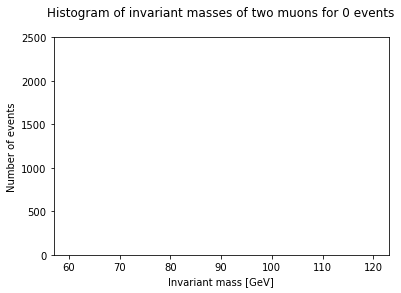

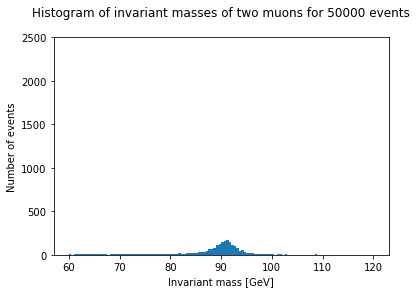

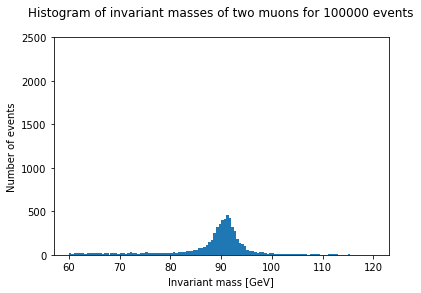

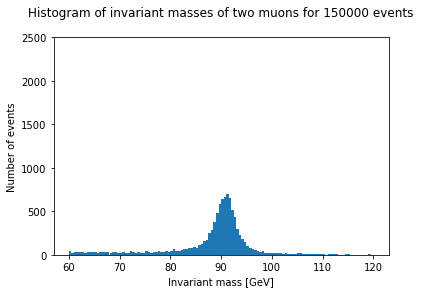

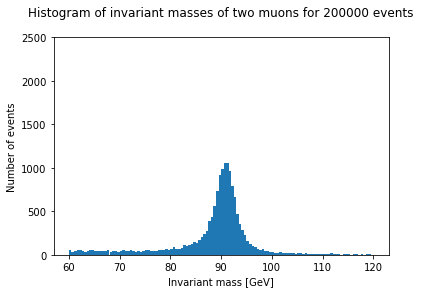

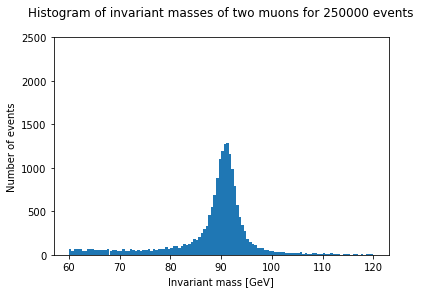

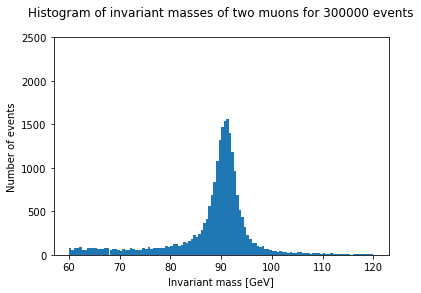

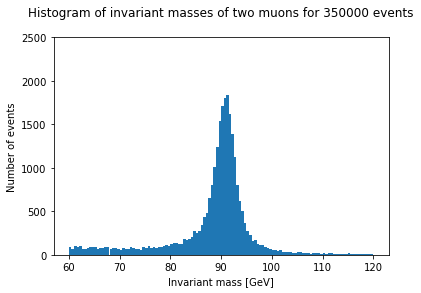

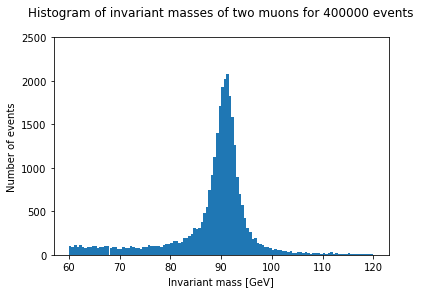

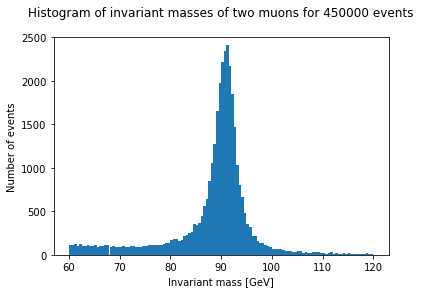

In [44]:
# Loop where a new histogram is plotted after 50000 events until 450000 events have reached.

for a in range(0,475465,50000):
    T = invariant_mass[0:a]
    
    %matplotlib inline
    plt.hist(T, bins=120, range=(60,120))
    
    # Set y-axis from 0 to 800.
    axes = plt.gca()
    axes.set_ylim([0,2500])
    
    plt.xlabel('Invariant mass [GeV]')
    plt.ylabel('Number of events')
    plt.title('Histogram of invariant masses of two muons for {} events\n'.format(len(T)))
    plt.show()

# Plotting the invariant mass histogram

Let's prepare the histogram. 

In [ ]:
# Set the amount of bins to the histogram.
nr_bins = 500

## Plotting the histogram without the weights

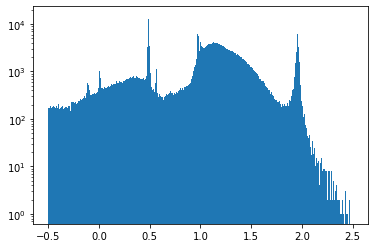

In [29]:
plt.hist(invariant_mass_log, bins=nr_bins, range=(-0.5,2.5))

plt.yscale('log')
plt.show()

## Plotting the histogram with the weights

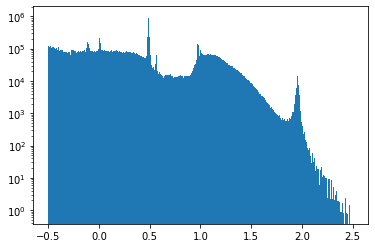

In [35]:
weights = [nr_bins/np.log(10)/invariant_mass for invariant_mass in invariant_mass]

# Take log10 from all of the values in "invariant_mass".
invariant_mass_log = np.log10(invariant_mass)

# Plot the histogram with the plt.hist()-function of the matplotlib.pyplot module.
# "bins" determines the number of bins used, "range" determines the limits of the x-axis
# and "weights" determines the weights to the histogram.
plt.hist(invariant_mass_log, bins=nr_bins, range=(-0.5,2.5), weights=weights)

# Set y-axis to logarithmic.
plt.yscale('log')
plt.show()

# The effect of the pseudorapidity $\eta$ to the resolution of the CMS detector

In this excercise the CMS (Compact Muon Solenoid) detector and the concept of pseudorapidity is introduced. With the real data collected by CMS detector the effect of the pseudorapidity to the resolution of the CMS detector is observed.

## Pseudorapidity

In experimental particle physics pseudorapidity $\eta$ is a spatial coordinate used to describe the angle between a particle and the particle beam. Pseudorapidity is determined by the equation

$$ \eta \equiv -\ln(\tan(\frac{\theta}{2})), $$

where $\theta$ is the angle of a particle relative to the particle beam.

Pseudorapidity thus describes the angle between a detected particle and the particle beam. In the image below the particle beam would go horizontally from left to right. So with the large values of $\eta$ a particle created in the collision would differ just a little from the direction of the beam. With the small values of $\eta$ the deflection is bigger.

<img src="../Images/Pseudorapidity_plot.png" alt="Image of pseudorapidity values" style="height: 200px">

(Image: Wikimedia user Mets501, Own work, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=20392149)
<br>
<br>
<br>

## The effect of pseudorapidity to the resolution of the measurement

With the CMS detector for example momenta of particles can be measured. Pseudorapidity $\eta$ affects to the resolution of the measurement of momenta. The particles that hit in the middle part of the detector (in the barrel) can be measured more accurate than the particles that hit in the end of the detector (in the endcap).

The reason for that is probably that the particles that have flown to the endcap have encountered more other matter (other particles) than the particles hit in the barrel. The interaction with other matter will cause inaccuracy to the measurements of the particles hit in the endcap.

In the image below there is a draft of the two particles created in the collision event. One hits the barrel of the detector and another hits the endcap. There are also the values of pseudorapidities $\eta$ and the angles $\theta$ of the particles.

<img src="../Images/Sylinder.png" alt="Draft of the CMS detector" style="height: 300px">

### Selecting the events

First we will select from all the events into two groups the events where the pseudorapidity of the two muons have been relatively large (e.g.  $\eta$ > 1.52) and relatively small (e.g.  $\eta$ < 0.45). The selection is made with the code below. We want about the same amount of events to both groups so that the comparison could be done.
Perform the selection by running the code below. 

In [31]:
# Set the conditions to large and small etas. These can be changed, but it has to be taken
# care that about the same amount of events are selected in both groups.
cond1 = 1.52
cond2 = 0.45

# Create two DataFrames. Select to "large_etas" events where the pseudorapidities
# of the both muons are larger than "cond1". Select to "small_etas" events where
# the pseudorapidities of the both muons are smaller than "cond2".
large_etas = dataset[(np.absolute(dataset.eta1) > cond1) & (np.absolute(dataset.eta2) > cond1)]
small_etas = dataset[(np.absolute(dataset.eta1) < cond2) & (np.absolute(dataset.eta2) < cond2)]

# Print two empty lines for better design.
print('\n' * 2)

print('The amount of all events = %d' % len(dataset))
print('The amount of events where the pseudorapidity of both muons has been large = %d' %len(large_etas))
print('The amount of events where the pseudorapidity of both muons has been small = %d' %len(small_etas))




The amount of all events = 475465
The amount of events where the pseudorapidity of both muons has been large = 34263
The amount of events where the pseudorapidity of both muons has been small = 45661


### Creating the histograms

Next we will create the separate histograms of the invariant masses for the events with the large pseudorapidities and with the small pseudorapidities. With the histograms we can compare these two situations.

#### Histogram for the large $\eta$ events 

Let's start with the events where the pseudorapidity of both of the muons has been large.

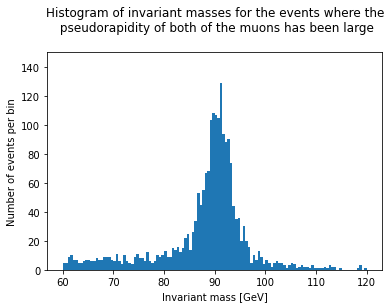

In [32]:
# Save the invariant masses to variable "inv_mass1".
inv_mass1 = large_etas['M']

# Create the histogram from data in variable "inv_mass1". Set bins and range.
plt.hist(inv_mass1, bins=120, range=(60,120))

# Set y-axis range from 0 to 60.
axes = plt.gca()
axes.set_ylim([0,150])

# Name the axises and give a title.
plt.xlabel('Invariant mass [GeV]')
plt.ylabel('Number of events per bin')
plt.title('Histogram of invariant masses for the events where the\n pseudorapidity of both of the muons has been large\n')
plt.show()

#### Histogram for the small $\eta$ events

Analogously than above, let's plot the histogram of the invariant masses for the events where the pseudorapidity of both of the muons has been small.

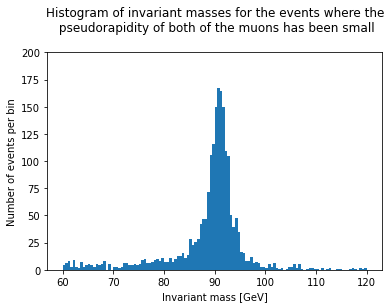

In [33]:
# Save the invariant masses to variable "inv_mass2".
inv_mass2 = small_etas['M']

# Create the histogram from data in variable "inv_mass1". Set bins and range.
plt.hist(inv_mass2, bins=120, range=(60,120))

# Set y-axis range from 0 to 60.
axes = plt.gca()
axes.set_ylim([0,200])

# Name the axises and give a title.
plt.xlabel('Invariant mass [GeV]')
plt.ylabel('Number of events per bin')
plt.title('Histogram of invariant masses for the events where the\n pseudorapidity of both of the muons has been small\n')
plt.show()

# Exercises

Now we have created from the real CMS data the two histograms of the invariant masses. With the help of the histograms and the theory part of the notebook think about the following questions:

__Question 1)__ In which way you can see the effect of the pseudorapidity to the measurement resolution of the CMS detector?

__Question 2)__ Do your results show the same than the theory predicts?

After answering to the questions you can try to change the conditions for the large and small pseudorapidities in the first code cell. The conditions are named _cond1_ and _cond2_. Make sure you choose conditions in a way that there will be nearly same amount of events in both of the groups.

__Question 3)__ After the changes run the code again. How do the changes affect to the number of the events? And how to the histograms?

__Question 4)__ Write a function that represents Breit-Wigner distribution to the values of the histogram. 

To get information about mass and lifetime of the detected resonance, a function that describes the distribution of the invariant masses must be fitted to the values of the histogram. In our case the values follow a Breit-Wigner distribution:

$$
N(E) = \frac{K}{(E-M)^2 + \frac{\Gamma^2}{4}},
$$

where $E$ is the energy, $M$ the maximum of the distribution (equals to the mass of the particle that is detected in the resonance), $\Gamma$ the full width at half maximum (FWHM) or the decay width of the distribution and $K$ a constant.

The Breit-Wigner distribution can also be expressed in the following form:

$$
\frac{ \frac{2\sqrt{2}M\Gamma\sqrt{M^2(M^2+\Gamma^2)} }{\pi\sqrt{M^2+\sqrt{M^2(M^2+\Gamma^2)}}} }{(E^2-M^2)^2 + M^2\Gamma^2},
$$

where the constant $K$ is written open.

The decay width $\Gamma$ and the lifetime $\tau$ of the particle detected in the resonance are related in the following way:

$$
\Gamma \equiv \frac{\hbar}{\tau},
$$

where $\hbar$ is the reduced Planck's constant.

__Question 5)__ Calculate the lifetime $\tau$ of the Z boson with the uncertainty by using the fit. Compare the calculated value to the known lifetime of the Z. What do you notice? What could possibly explain your observations?